# Programming Exercise: Dimensionality Reduction PCA vs AE
In this exercise you will have to reduce the dimensionality of the Iris dataset to 2 using PCA and an AE.
The AutoEncoder consists of an encoder (4→8→2) and a decoder (2→8→4).

In [20]:
#You can use these packages, but you can also use other
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

plt.rcParams['figure.figsize'] = (6,4)

In [21]:
# Please enter your names
name = "Fabian Langer, Yannik Bretschneider"

In [22]:
#load data
iris = load_iris()
X = iris.data     
y = iris.target  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
Apply PCA to reduce the dimension to 2.

In [23]:
# PCA
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(X_scaled)

# AE
 Create and train an AutoEncoder consisting of an encoder (4→8→2) and a decoder (2→8→4).
 Train it for 200 epochs with a batch size of 16.

In [ ]:
input_l = Input(shape=(4,))

# encoder (4→8→2)
encoded = Dense(8, activation='relu')(input_l)
encoded = Dense(2, activation='relu')(encoded)

# decoder (2→8→4)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(4, activation='linear')(decoded)

# autoencoder: this model maps an input to its reconstruction
autoencoder = Model(input_l, decoded)

# Separate encoder model: this model maps an input to its encoded representation
encoder = Model(input_l, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train autoencoder
autoencoder.fit(X_scaled, X_scaled,
                epochs=200,
                batch_size=16,
                shuffle=True,
                verbose=0)

# Extract reduced output for X_scaled
Z_ae = encoder.predict(X_scaled)

ValueError: Cannot convert '4' to a shape.

# Visualization

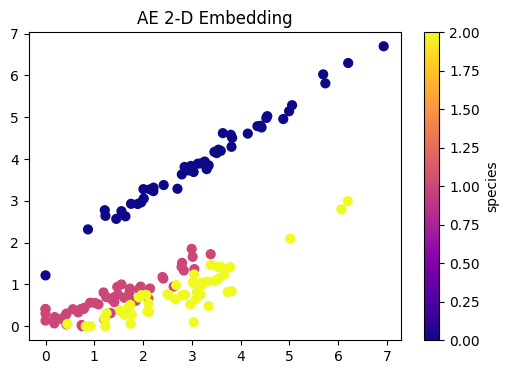

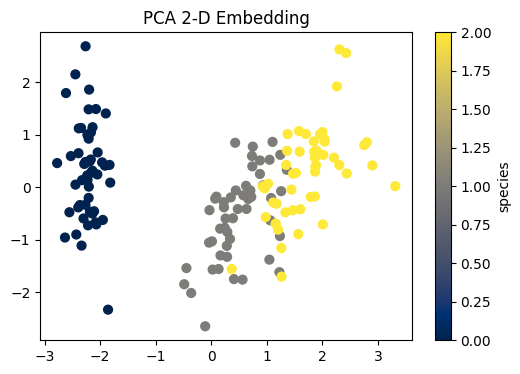

In [25]:
# AE
plt.figure()
plt.scatter(Z_ae[:,0], Z_ae[:,1], c=y, cmap='plasma', s=40)
plt.title('AE 2-D Embedding')
plt.colorbar(label='species')
plt.show()

# PCA
plt.figure()
plt.scatter(Z_pca[:,0], Z_pca[:,1], c=y, cmap='cividis', s=40)
plt.title('PCA 2-D Embedding')
plt.colorbar(label='species')
plt.show()
